In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn.neural_network

In [3]:
import torch.nn

In [4]:
SIZE = 10000

truth = np.random.randint(0, 2, SIZE)

bimodal = np.random.randint(0, 2, SIZE)
corner = np.zeros((SIZE, 2))

corner[(truth == 0) & (bimodal == 0), 0] = -1
corner[(truth == 0) & (bimodal == 0), 1] = -1
corner[(truth == 0) & (bimodal == 1), 0] = 1
corner[(truth == 0) & (bimodal == 1), 1] = 1

corner[(truth == 1) & (bimodal == 0), 0] = 1
corner[(truth == 1) & (bimodal == 0), 1] = -1
corner[(truth == 1) & (bimodal == 1), 0] = -1
corner[(truth == 1) & (bimodal == 1), 1] = 1

position = np.random.normal(0, 1, (10000, 2)) + 2*corner

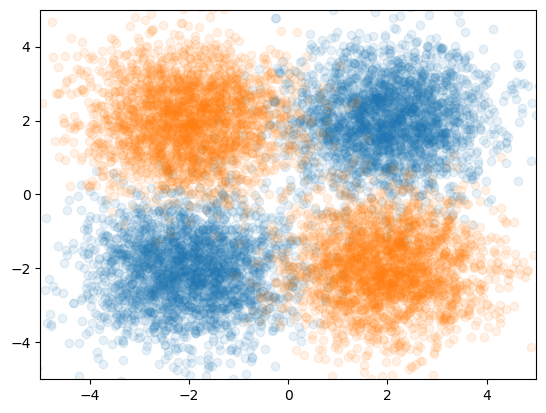

In [5]:
fig, ax = plt.subplots()

ax.scatter(position[truth == 0, 0], position[truth == 0, 1], alpha=0.1)
ax.scatter(position[truth == 1, 0], position[truth == 1, 1], alpha=0.1)

ax.axis([-5, 5, -5, 5])

None

In [6]:
sklearn_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000)
sklearn_network.fit(position, truth)

MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000)

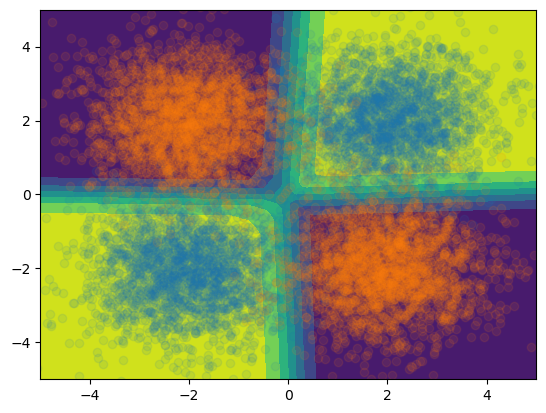

In [7]:
fig, ax = plt.subplots()

background_x, background_y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
background_as_inputs = np.column_stack([background_x.ravel(), background_y.ravel()])

probabilities = sklearn_network.predict_proba(background_as_inputs)

ax.contourf(background_x, background_y, probabilities[:, 0].reshape(background_x.shape))

ax.scatter(position[truth == 0, 0], position[truth == 0, 1], alpha=0.1)
ax.scatter(position[truth == 1, 0], position[truth == 1, 1], alpha=0.1)

ax.axis([-5, 5, -5, 5])

None

In [8]:
pytorch_truth = torch.from_numpy(truth)

In [9]:
pytorch_position = torch.from_numpy(position).float()

In [10]:
class PyTorchNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.neural_network = torch.nn.Sequential(
            torch.nn.Linear(2, 6),   # input x-y to 6-dimensional hidden layer
            torch.nn.ReLU(),         # non-linear activation function
            torch.nn.Linear(6, 2),   # 2-dimensional output for (class1, class2)
        )

    def forward(self, x):
        return self.neural_network(x)

pytorch_network = PyTorchNetwork()
pytorch_network

PyTorchNetwork(
  (neural_network): Sequential(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=2, bias=True)
  )
)

In [11]:
list(pytorch_network.parameters())

[Parameter containing:
 tensor([[ 0.1556, -0.3627],
         [ 0.4007,  0.5609],
         [ 0.3120,  0.0493],
         [-0.5621, -0.4095],
         [ 0.5718,  0.1572],
         [ 0.1722,  0.1081]], requires_grad=True),
 Parameter containing:
 tensor([-0.2047,  0.1363, -0.3916,  0.5658,  0.2409, -0.6554],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2149, -0.1444, -0.0188,  0.1175,  0.0129,  0.3887],
         [ 0.0061,  0.3523, -0.2737,  0.2052,  0.2391, -0.3626]],
        requires_grad=True),
 Parameter containing:
 tensor([0.3103, 0.0025], requires_grad=True)]

In [12]:
softmax = torch.nn.LogSoftmax(dim=1)

In [13]:
loss_function = torch.nn.NLLLoss()

In [14]:
optimizer = torch.optim.Adam(pytorch_network.parameters(), lr=0.03)

In [15]:
for i in range(1000):
    optimizer.zero_grad()
    
    prediction = softmax(pytorch_network(pytorch_position))
    
    loss = loss_function(prediction, pytorch_truth)
    
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
        print(f"{i + 1 = } {loss = }")

i + 1 = 100 loss = tensor(0.1135, grad_fn=<NllLossBackward0>)
i + 1 = 200 loss = tensor(0.1131, grad_fn=<NllLossBackward0>)
i + 1 = 300 loss = tensor(0.1130, grad_fn=<NllLossBackward0>)
i + 1 = 400 loss = tensor(0.1129, grad_fn=<NllLossBackward0>)
i + 1 = 500 loss = tensor(0.1129, grad_fn=<NllLossBackward0>)
i + 1 = 600 loss = tensor(0.1129, grad_fn=<NllLossBackward0>)
i + 1 = 700 loss = tensor(0.1129, grad_fn=<NllLossBackward0>)
i + 1 = 800 loss = tensor(0.1129, grad_fn=<NllLossBackward0>)
i + 1 = 900 loss = tensor(0.1128, grad_fn=<NllLossBackward0>)
i + 1 = 1000 loss = tensor(0.1128, grad_fn=<NllLossBackward0>)


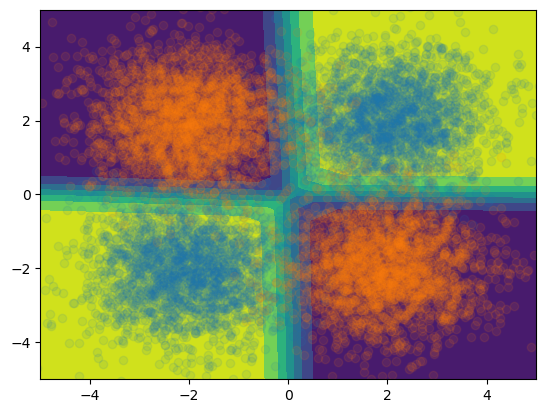

In [16]:
fig, ax = plt.subplots()

background_x, background_y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
background_as_inputs = np.column_stack([background_x.ravel(), background_y.ravel()])

probabilities = torch.nn.Softmax(dim=1)(pytorch_network(torch.from_numpy(background_as_inputs).float())).detach().numpy()

ax.contourf(background_x, background_y, probabilities[:, 0].reshape(background_x.shape))

ax.scatter(position[truth == 0, 0], position[truth == 0, 1], alpha=0.1)
ax.scatter(position[truth == 1, 0], position[truth == 1, 1], alpha=0.1)

ax.axis([-5, 5, -5, 5])

None